# Imported Librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

## Loading Data Up and Data Cleaning

In the cells below I am going to load up the data. Cars_data is going to be data from bcourses which was provided to us. Then I get data from Fred (website):https://fred.stlouisfed.org/series/TOTALSA, which I labeled as cars_data_2. I am going to be using that to improve my overall model. Also I added an extra column called date, which I needed to use to identify the sales per month in each year as the question has asked me to do so.

In [3]:
cars_data = pd.read_csv('Accord-142-Fall2023.csv')
cars_data_2 = pd.read_csv('TOTALSA.csv')
display(cars_data.head())
display(cars_data_2.head())

,MonthNumeric,MonthFactor,Year,AccordSales,Unemployment,AccordQueries,CPIAll,CPIEnergy,MilesTraveled
0,1,January,2014,20604,6.6,69,235.288,250.340,246531
1,2,February,2014,24622,6.7,74,235.547,249.925,249499
2,3,March,2014,33962,6.7,79,236.028,249.961,251120
3,4,April,2014,34124,6.2,74,236.468,249.864,251959
4,5,May,2014,39637,6.3,75,236.918,249.213,252289


,DATE,TOTALSA
0,1976-01-01,12.814
1,1976-02-01,13.340
2,1976-03-01,13.378
3,1976-04-01,13.223
4,1976-05-01,12.962


In [4]:
# So this to make Mon
def month_to_num(month):
    month_dict = {
        'January': '01', 'February': '02', 'March': '03', 'April': '04', 'May': '05', 'June': '06',
        'July': '07', 'August': '08', 'September': '09', 'October': '10', 'November': '11', 'December': '12'
    }
    return month_dict.get(month)

# Apply the function to create a new column "MonthNumeric"

cars_data["MonthNumeric_2"] = cars_data["MonthFactor"].apply(month_to_num)

# Create the "Date" column by combining "Year," "MonthNumeric," and a placeholder day

cars_data["Date"] = pd.to_datetime(cars_data["Year"].astype(str) + cars_data["MonthNumeric_2"] + '01', format='%Y%m%d')

# Drop the temporary "MonthNumeric" column if needed
cars_data.drop("MonthNumeric_2", axis=1, inplace=True)
cars_data.head()

,MonthNumeric,MonthFactor,Year,AccordSales,Unemployment,AccordQueries,CPIAll,CPIEnergy,MilesTraveled,Date
0,1,January,2014,20604,6.6,69,235.288,250.340,246531,2014-01-01
1,2,February,2014,24622,6.7,74,235.547,249.925,249499,2014-02-01
2,3,March,2014,33962,6.7,79,236.028,249.961,251120,2014-03-01
3,4,April,2014,34124,6.2,74,236.468,249.864,251959,2014-04-01
4,5,May,2014,39637,6.3,75,236.918,249.213,252289,2014-05-01


In [5]:
selected_rows =  cars_data_2.loc[456:569].reset_index(drop=True)
display(selected_rows.head(2))
combined_df = pd.concat([cars_data, selected_rows], axis=1)
combined_df = combined_df.reset_index(drop=True)
combined_df.head(2)

,DATE,TOTALSA
0,2014-01-01,15.614
1,2014-02-01,15.993


,MonthNumeric,MonthFactor,Year,AccordSales,Unemployment,AccordQueries,CPIAll,CPIEnergy,MilesTraveled,Date,DATE,TOTALSA
0,1,January,2014,20604,6.6,69,235.288,250.340,246531,2014-01-01,2014-01-01,15.614
1,2,February,2014,24622,6.7,74,235.547,249.925,249499,2014-02-01,2014-02-01,15.993


In [6]:
new_car_train = combined_df[combined_df["Year"] <= 2018]
new_car_test = combined_df[combined_df["Year"] > 2018]

display(new_car_train.head())
display(new_car_test.head())

print(len(new_car_train))
print(len(new_car_test))

,MonthNumeric,MonthFactor,Year,AccordSales,Unemployment,AccordQueries,CPIAll,CPIEnergy,MilesTraveled,Date,DATE,TOTALSA
0,1,January,2014,20604,6.6,69,235.288,250.340,246531,2014-01-01,2014-01-01,15.614
1,2,February,2014,24622,6.7,74,235.547,249.925,249499,2014-02-01,2014-02-01,15.993
2,3,March,2014,33962,6.7,79,236.028,249.961,251120,2014-03-01,2014-03-01,16.985
3,4,April,2014,34124,6.2,74,236.468,249.864,251959,2014-04-01,2014-04-01,16.695
4,5,May,2014,39637,6.3,75,236.918,249.213,252289,2014-05-01,2014-05-01,17.137


,MonthNumeric,MonthFactor,Year,AccordSales,Unemployment,AccordQueries,CPIAll,CPIEnergy,MilesTraveled,Date,DATE,TOTALSA
60,1,January,2019,18786,4.0,81,252.718,206.808,273421,2019-01-01,2019-01-01,17.291
61,2,February,2019,20254,3.8,84,253.322,209.143,272141,2019-02-01,2019-02-01,16.968
62,3,March,2019,25371,3.8,90,254.202,214.305,270920,2019-03-01,2019-03-01,17.733
63,4,April,2019,19239,3.7,84,255.211,222.300,271928,2019-04-01,2019-04-01,16.898
64,5,May,2019,23892,3.7,85,255.290,219.682,271676,2019-05-01,2019-05-01,17.725


60
54


# Problem statement

Nearly all companies seek to accurately predict future sales of their product(s). If the company
can accurately predict sales before producing the product, then they can better match production
with customer demand, thus reducing unnecessary inventory costs while being able to satisfy the
demand for its product.

In this exercise, you are asked to predict the monthly sales in the United States of the Honda
Accord automobile. Honda is a brand of Japanese automobiles that is now the seventh-largest
automobile manufacturer in the world, and is consistently rated one of the top car manufacturers
in the United States. The Accord is a car model of Honda that was first produced in 1981. It is one
of Honda’s best-selling cars in the United States. We will use linear regression to predict monthly
sales of the Accord using economic indicators of the United States as well as (normalized) Google
search query volumes. The data for this problem is contained in the file Accord-142-Fall2023.csv.
Each observation in the file is for a single month, from January 2014 through June 2023. The
variables are described in Table 1


a) Start by splitting the data into a training set and a testing set. The training
set should contain all observations from 2014 through 2018. The testing set should have all
observations from January 2019 through June 2023.


Consider just the five independent variables Unemployment, AccordQueries, CPIEnergy, CPIAll
and MilesTraveled. Using your regression skills, select a subset of these five variables and
construct a regression model to predict monthly Accord sales (AccordSales). Try to choose
which of the five variables to use in your model in order to build a high-quality linear regression
model. Use the training set to build your model, and do not add any additional variables
beyond the five indicated independent variables. Write a brief explanation (no more than
one page, preferably less) – targeted to a statistically literate manager – describing how you
decided on the variables to use in the model and the quality of the linear regression model’s
predictions, as evaluated using the training set (there is no need to consider the test set for
this part of the problem). Be sure to address the following in your explanation:


In [7]:
# Step 1 is to split up the data like the problem statement request.
# car_train is the training_Set for all observation from 2014 through 2018.
car_train = cars_data[cars_data["Year"] <= 2018]
# car_test is the test_Set for observation from January 2019 through June 2023
car_test = cars_data[cars_data["Year"] > 2018]

# display purposes to see if the code was corretly implemented
display(car_train.head(2))
display(car_test.head(2))

# Testing the length to make sure the split was correct. Total rows are 114. 
print(len(car_train))
print(len(car_test))

,MonthNumeric,MonthFactor,Year,AccordSales,Unemployment,AccordQueries,CPIAll,CPIEnergy,MilesTraveled,Date
0,1,January,2014,20604,6.6,69,235.288,250.340,246531,2014-01-01
1,2,February,2014,24622,6.7,74,235.547,249.925,249499,2014-02-01


,MonthNumeric,MonthFactor,Year,AccordSales,Unemployment,AccordQueries,CPIAll,CPIEnergy,MilesTraveled,Date
60,1,January,2019,18786,4.0,81,252.718,206.808,273421,2019-01-01
61,2,February,2019,20254,3.8,84,253.322,209.143,272141,2019-02-01


60
54


                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     3.683
Date:                Tue, 03 Oct 2023   Prob (F-statistic):            0.00612
Time:                        12:28:48   Log-Likelihood:                -595.60
No. Observations:                  60   AIC:                             1203.
Df Residuals:                      54   BIC:                             1216.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.735e+05   1.49e+05      1.164

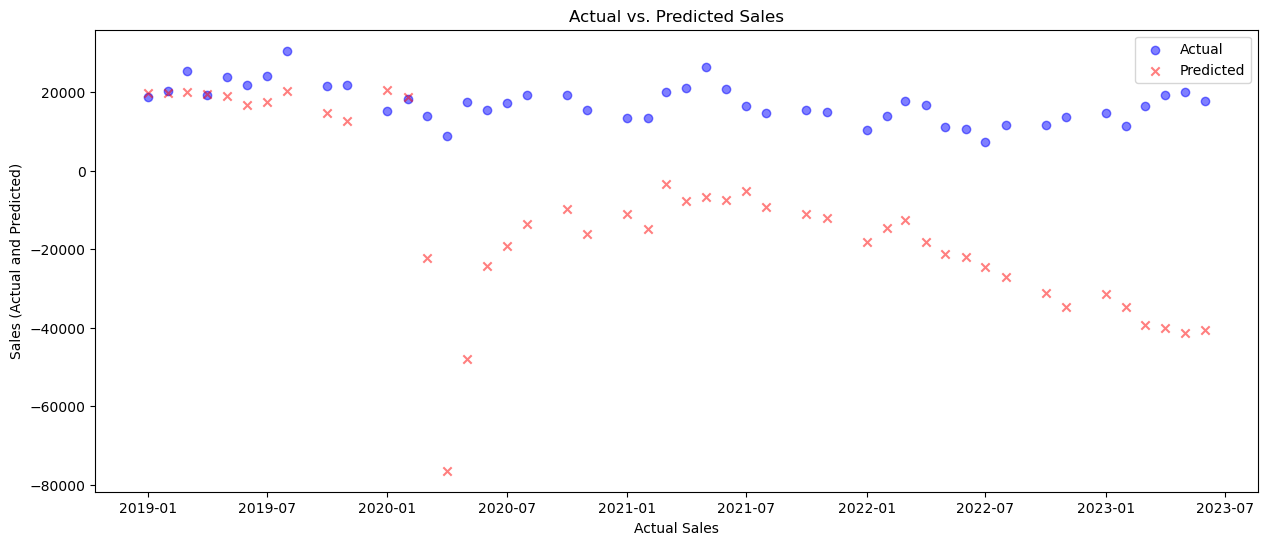

In [8]:
# Here we start building our regression model model.
ols = smf.ols(formula ='AccordSales ~ Unemployment + AccordQueries + CPIAll +  MilesTraveled + CPIEnergy ',
                 data = car_train)

model1 = ols.fit()
print(model1.summary())

actual_sales = car_test['AccordSales']
predicted_sales = model1.predict(car_test)

# Create a scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(car_test["Date"], actual_sales, label='Actual', color='blue', marker='o', alpha=0.5)
plt.scatter(car_test["Date"], predicted_sales, label='Predicted', color='red', marker='x', alpha=0.5)

plt.xlabel('Actual Sales')
plt.ylabel('Sales (Actual and Predicted)')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

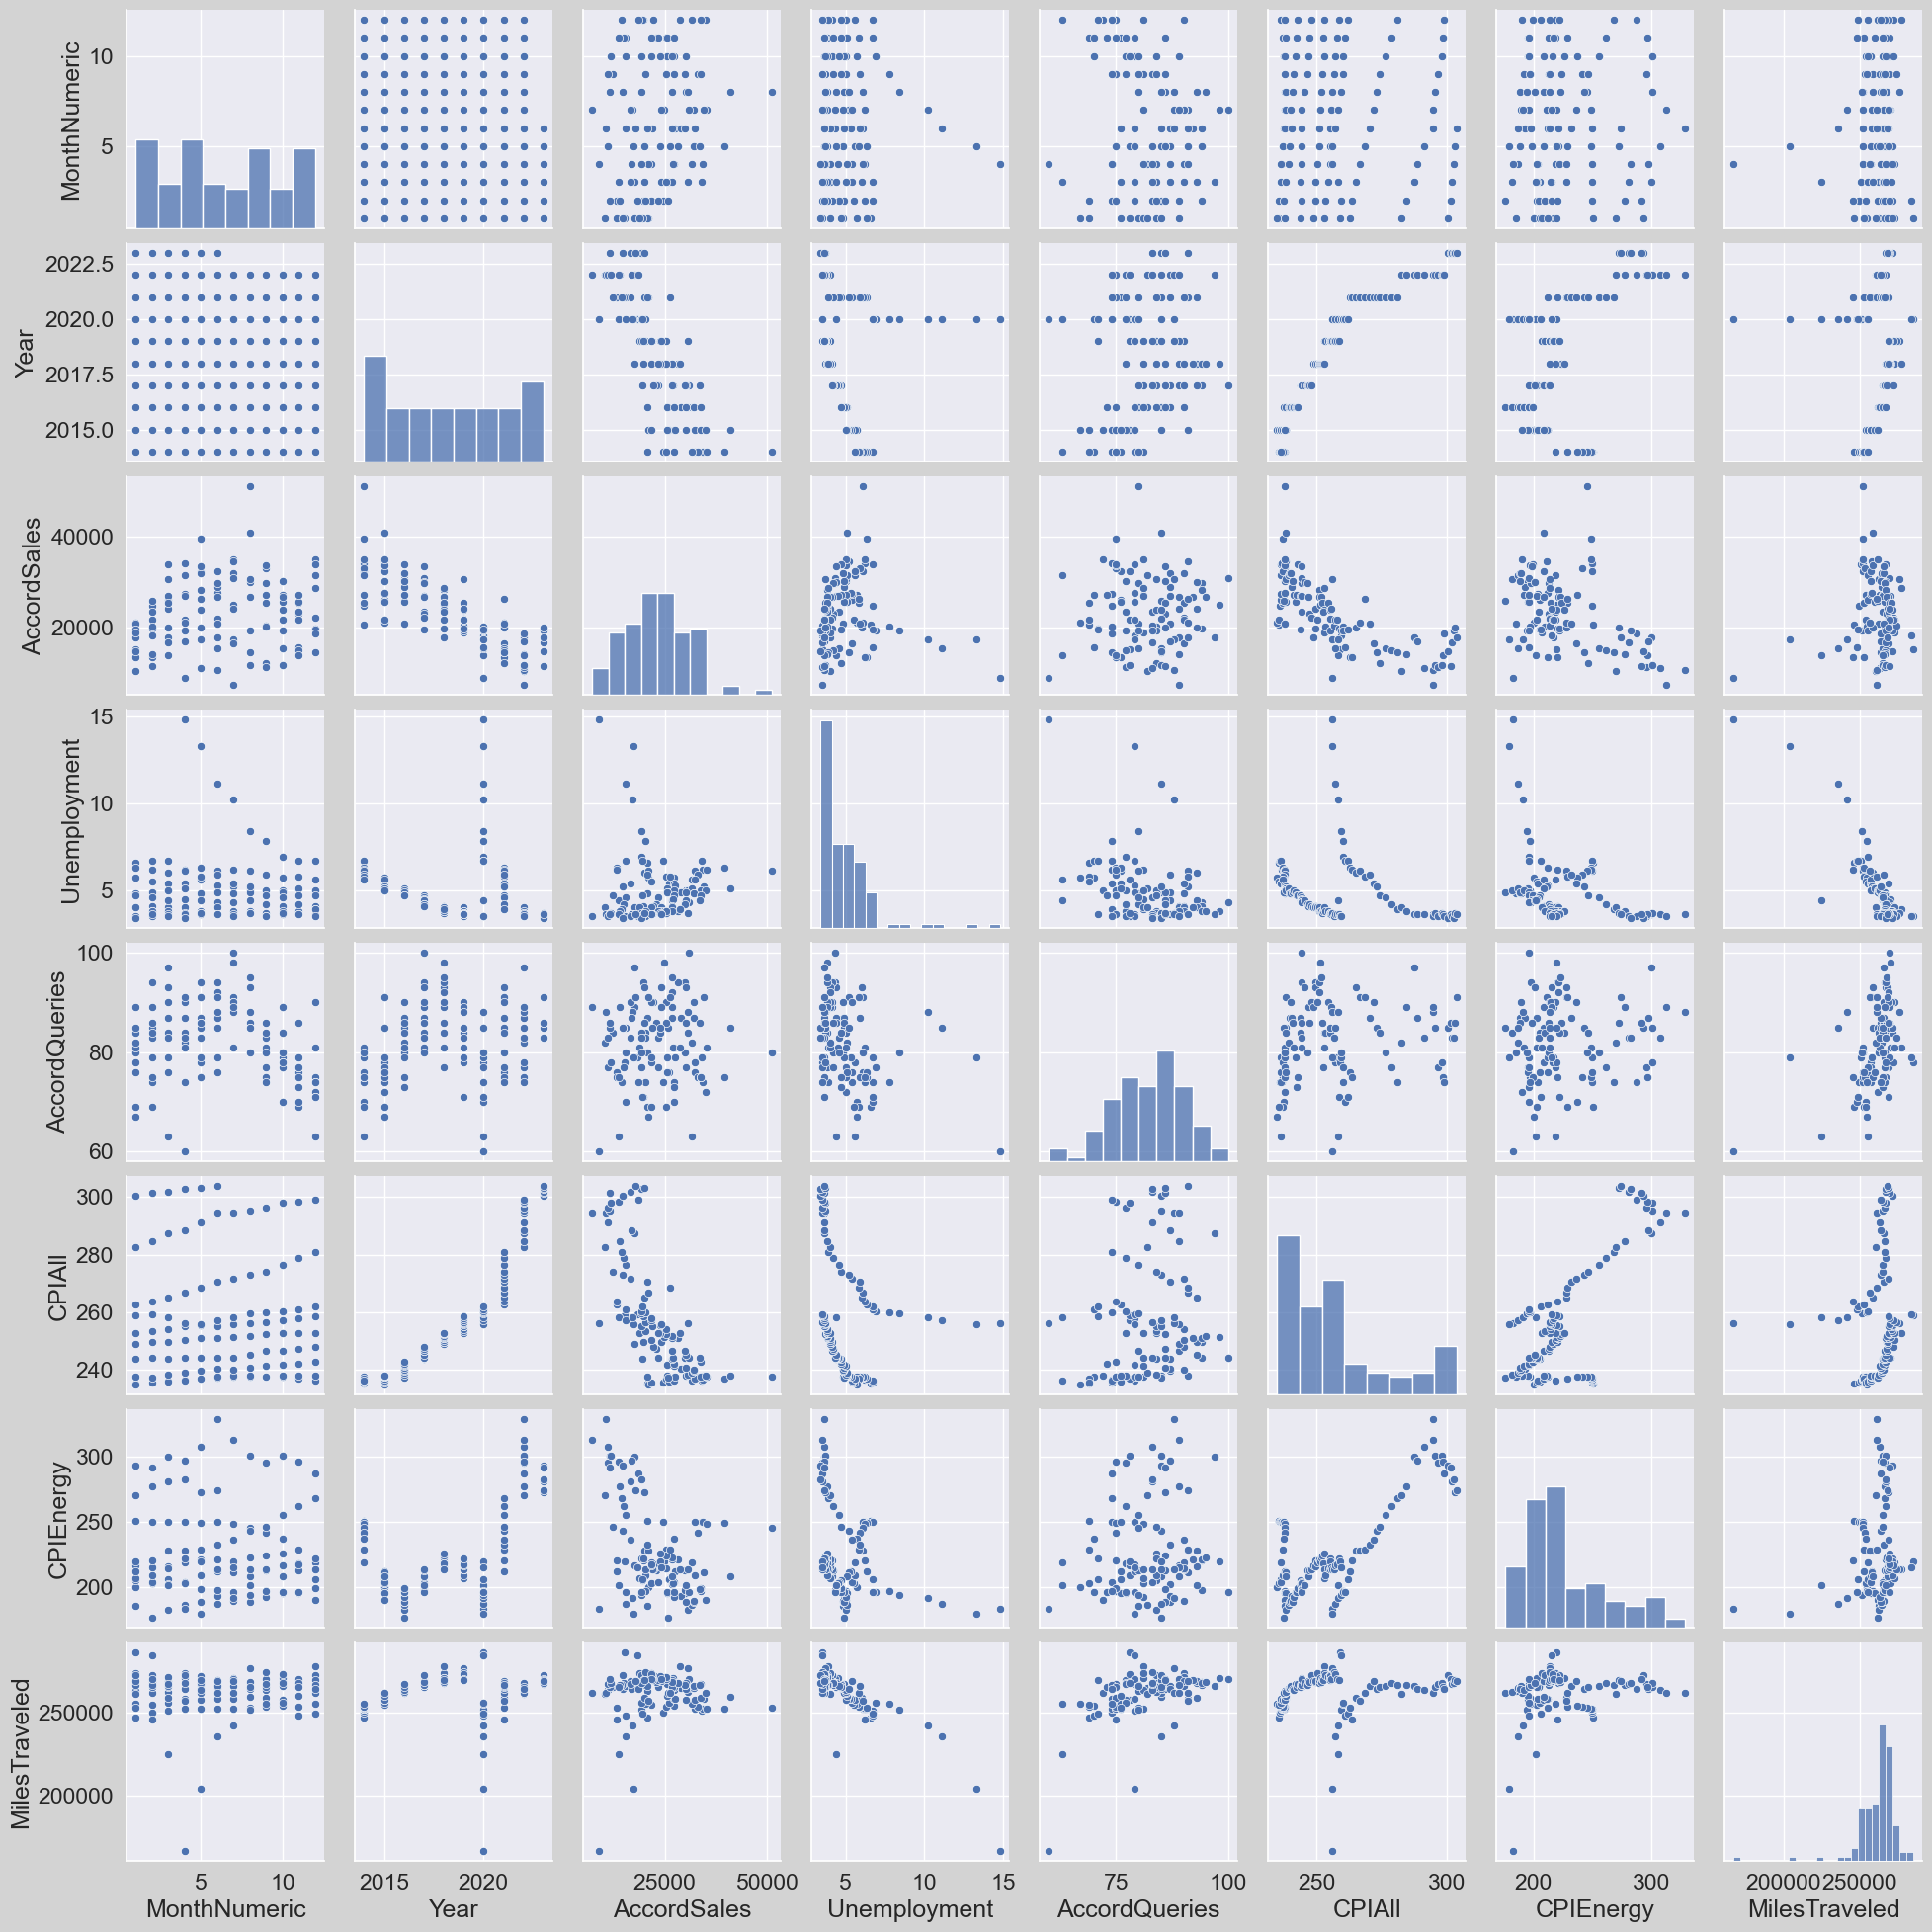

In [9]:
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
g = sns.pairplot(cars_data)
g.fig.set_facecolor("lightgray")

## Anaylsis on the model and feature selections

i) What is the linear regression equation produced by your model, and how should one
interpret the coefficients for the independent variables? Consider interpretability issues
when writing down the equation (e.g., do not just copy and paste the output from
Python).

The linear regression from our model was Y = 173,500 &beta;0 + -1833.6589 &beta;₁ + 225.2323 &beta;₂ + -1443.0327 &beta;₃ + 0.5860 &beta;₄ +  192.5350 &beta;₅. 
Let interpet each coefficents now, we have &beta;0 which our simple intercept, doesn't really tell much about it being good or bad, but it does tell us that we have high positive intercept when it comes to predicting prices. For &beta;₁ which is unemployment, which tell us that it negatively effects the AccordSales, which makes sense because you can't be jobless and be buying a car. Up next is &beta;₂ which is AccordQueries, which very small in term if its numerical value, but that isn't suprised as its value that has been normaizled for how many times people search for Honda Accord on Google. Up next is &beta;₃ , which is CPIAll, which tell us when consumer price index changes, so this tell us there is negative effect on AccordSales, and this would make sense because if you house hold of goods is increased, you most likely won't be able to afford a car, or be buying one at least. Next is &beta;₄ which is MilesTraveled, it has positive effect on AccordSales but I think this is so small compared to the other values, that we shouldn't even consider it. Our last coefficent is &beta;₅ which is 192, this a bit weird to be because I expected it to be negative just like CPIALL, after all when your energy increases, you can't afford a car? or you wouldn't be looking to buy one, but according to this, it impacts Accord sales positvely which is weird to me.



ii) How did you select the variables to include in your linear regression model?
This question told us to pick the variables? But I am assume this question is asking which variables we decide to keep fromt his linear regression. For that you would want the lowest p-value coeficients which would be AcccordQueries but I did drew a graph and based on that graph and seeing which variables correlate with accord sales and increase the f-statistics, I decided to keep only CPIAll and CPIEnergy, but you can also keep AccordQuerries, its not really changing anything by that much, it would help to prevent overfitting, it does increase the f-statistic when dropped so I would only include CPIALL and CPIEnergy.

iii) Do the signs of the model’s coefficients make sense? Are you reasonably sure that the
signs are correct?

Yes all the coefficents make sense except the CPIENERGy, I would expect it to be negative since when energy is high, like the cost of it, you would assume it would negatively impact the accord sales or have negative correlation, but it seems to have positive correlation, based on the graph and its positive value. My specutlation is because the data is weird, due the fact we have Ukraine-Russia conflict going on, something with Saudi as well and Covid, so I spectuale if I should really include CPIEnergy even if it has correlation due to the fact it may be outside factors that aren't being considered for.


iv) How well does the model predict training set observations? Can you justify the model’s
performance on the training data with a quantifiable metric? 

This model predicting training observations is terrible, it has such a low r_squared and ajusted r_squared, it definetly needs to be improved on. However, if you look at the chart I gave, you can see that these variables were prediciting pretty good until 2020. This when covid hit, so clearly COVID and other variables changed due to this unforessen event, but If you only did from 2019 to 2020 January, you would have a high adjusted r square, so the variables aren't bad. Basically this would have high OSR_squared for Set A like before 2020, and low OSR_squared for Set B after 2020, meaning it did have a strong predictive capabilties on which it was trained on but poor when tested on due the fact some outside variable occured.

0




##  Improved Model


Let us now try to further improve the linear regression model by modeling seasonality. In predicting demand and sales, seasonality is often very important since demand for most products tends to be periodic in time. For example, demand for heavy jackets and coats tends to be higher in the winter, while demand for sunscreen tends to be higher in the summer.


                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     7.982
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           2.66e-08
Time:                        12:29:01   Log-Likelihood:                -563.04
No. Observations:                  60   AIC:                             1160.
Df Residuals:                      43   BIC:                             1196.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

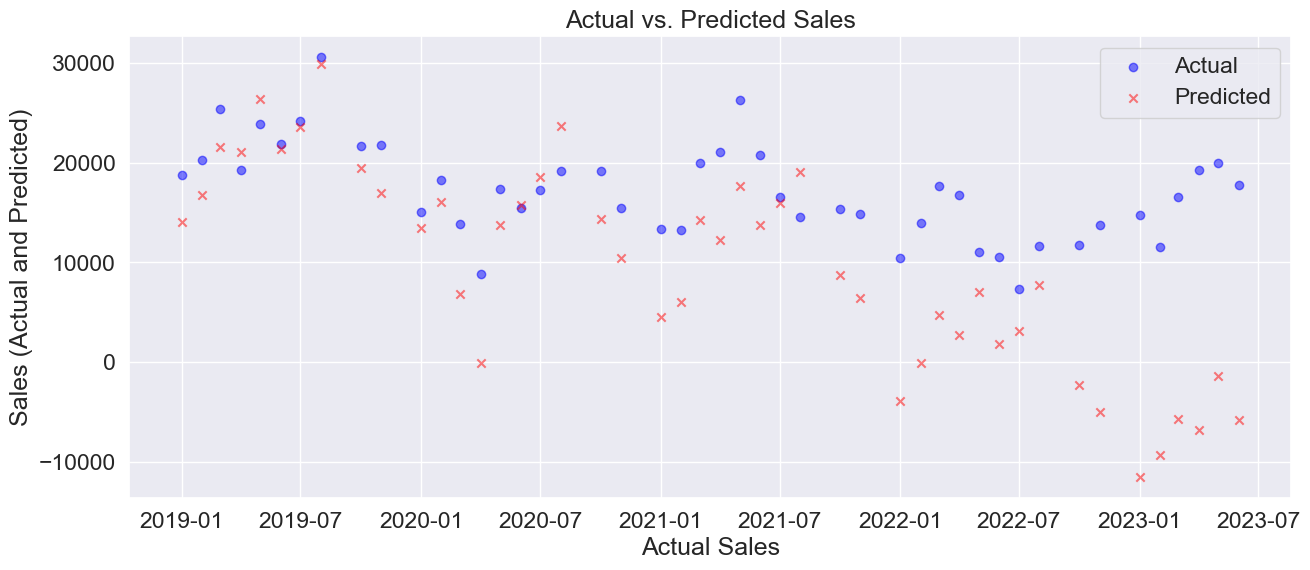

In [10]:
ols_2 = smf.ols(formula ='AccordSales ~ Unemployment + AccordQueries + CPIAll +  MilesTraveled + CPIEnergy + MonthFactor ',
                 data = car_train)

model2 = ols_2.fit()
print(model2.summary())

# Assuming you have a DataFrame 'car_test' with the same columns as 'car_train'
actual_sales = new_car_test['AccordSales']
predicted_sales = model2.predict(new_car_test)

# Create a scatter plot
plt.figure(figsize=(15, 6))

plt.scatter(car_test["Date"], actual_sales, 
            label='Actual', color='blue', marker='o', alpha=0.5)
plt.scatter(car_test["Date"], predicted_sales,
            label='Predicted', color='red', marker='x', alpha=0.5)

plt.xlabel('Actual Sales')
plt.ylabel('Sales (Actual and Predicted)')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

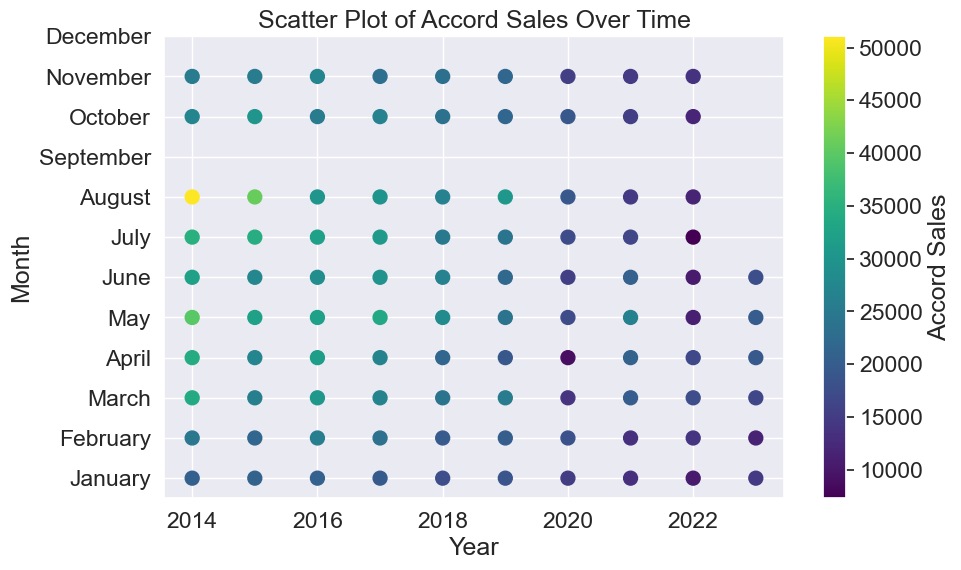

In [11]:
df = cars_data
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Map month names to numeric values (1 to 12)
month_to_numeric = {month: idx for idx, month in enumerate(month_names, start=1)}
df['MonthNumeric'] = df['MonthFactor'].map(month_to_numeric)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['MonthNumeric'], c=df['AccordSales'], cmap='viridis', s=100, marker='o')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Scatter Plot of Accord Sales Over Time')
plt.colorbar(label='Accord Sales')

# Set y-axis ticks to display month names
plt.yticks(range(1, 13), month_names)

# Show the plot
plt.grid(True)
plt.show()

Intercept                 9.775e+04      1e+05      0.977      0.334   -1.04e+05       3e+05
MonthFactor[T.August]     8697.6749   2713.554      3.205      0.003    3225.272    1.42e+04
MonthFactor[T.Decemeber]  3256.3031   2372.470      1.373      0.177   -1528.240    8040.846
MonthFactor[T.February]  -4825.4928   2587.989     -1.865      0.069      -1e+04     393.684
MonthFactor[T.January]   -8189.7564   2380.860     -3.440      0.001    -1.3e+04   -3388.294
MonthFactor[T.July]       3894.8622   2823.701      1.379      0.175   -1799.674    9589.398
MonthFactor[T.June]       1536.5375   2480.984      0.619      0.539   -3466.843    6539.918
MonthFactor[T.March]       430.1538   2582.819      0.167      0.869   -4778.598    5638.906
MonthFactor[T.May]        5573.2245   2463.065      2.263      0.029     605.980    1.05e+04
MonthFactor[T.November]  -1493.6532   2471.136     -0.604      0.549   -6477.174    3489.867
MonthFactor[T.October]     -25.6309   2305.022     -0.011      0.991   -4674.151    4622.889
MonthFactor[T.Septeber]   3046.1712   2378.322      1.281      0.207   -1750.173    7842.515
Unemployment               762.8155   3257.607      0.234      0.816   -5806.776    7332.407
AccordQueries               10.6620    144.801      0.074      0.942    -281.357     302.681
CPIAll                    -639.8070    627.629     -1.019      0.314   -1905.542     625.928
MilesTraveled                0.2497      0.388      0.643      0.524      -0.533       1.033
CPIEnergy                   67.5163     95.714      0.705      0.484    -125.508     260.541

## **Intreperation of the new model improvement**

**New model anaylsis. What is the regression equation?**

Dependent Variable= 97750 + 8697.6749×MonthFactor[T.August] + 3256.3031×MonthFactor[T.December]− 4825.4928×MonthFactor[T.February] − 8189.7564×MonthFactor[T.January] + 3894.8622×MonthFactor[T.July] + 1536.5375×MonthFactor[T.June] + 430.1538×MonthFactor[T.March] + 5573.2245×MonthFactor[T.May] − 1493.6532×MonthFactor[T.November] − 25.6309×MonthFactor[T.October] + 3046.1712×MonthFactor[T.September] + 762.8155×Unemployment + 10.6620×AccordQueries − 639.8070×CPIAll+0.2497×MilesTraveled + 67.5163×CPIEnergy.

I think It be pointless to go through each of the month variables, but you can clearly see August and May have greatest increase for AccordSales during these two months, and the weakest in Januaray and Feburary and Novemeber. However, the unemplyoment variable is now positive where as it was negative in our last model, which is interesting but everything else stayed the same so I would simply just look at part a. The variable coefficent changed because we added in MonthFactor but only Umemployment switched compeletly which is weird.


**What is the training set R2 for the new model?**

The training set R2 is now 0.748 and the adj. R-squared is 0.654, which is big improvement over our last model, indicating that adding month factor was the correct move. The most signifcant variables based on their p-values would be the month January, Feburary and August which have very small p-values. This changes the p-value for our old 5 variables from part a, to be even higher, so clearly the entirity of MonthFactor would be more important than the previous 5 variables. 

**Adding the independent variable MonthFactor improves the quality of the model?**

Yes, it does. We increased our adjusted r-squared and r-squared greatly, and our f-statistic increased a bit as well. However, you can see on the diagram above (the scatter plot with actual vs predicted values) that it is starting to fit better, which tell us that having month is a good thing. Where as before it was lingering by a lot toward the tail part.

**Can you think of a different way that you might use the given data to model seasonality?**

Do you think your new way would improve on the best model you have constructed so
far? (By the way, later in the course we will have a lecture dedicated to basic time series
modeling, and we will explore a number of ways to construct models using datasets with
an associated time component.)

I wouldn't want to group it by seasonality because it seems that its something other than the season that matter the most, but if you were to do the season summer would be highest (in terms of positive affect on AccordSales, meaning they get more sales during summer time) then spring, then Autmum and at last we would have winter months. But if I were ot construct something like that for our model I would do it yearly, I believe that it will effect it more than months, and creating time series model. 




# Improving the model through OSR2 testing


Build a final model using a subset of the independent variables used in parts (a) and (b), providing a brief justification for the variables selected. What is the training set R2? What is the OSR2 value for the testing set? Compare these two numbers and briefly analyze them. Please provide a plausible explanation for any significant differences you do or do not
observe.

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     10.28
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.16e-09
Time:                        12:29:10   Log-Likelihood:                -563.54
No. Observations:                  60   AIC:                             1155.
Df Residuals:                      46   BIC:                             1184.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

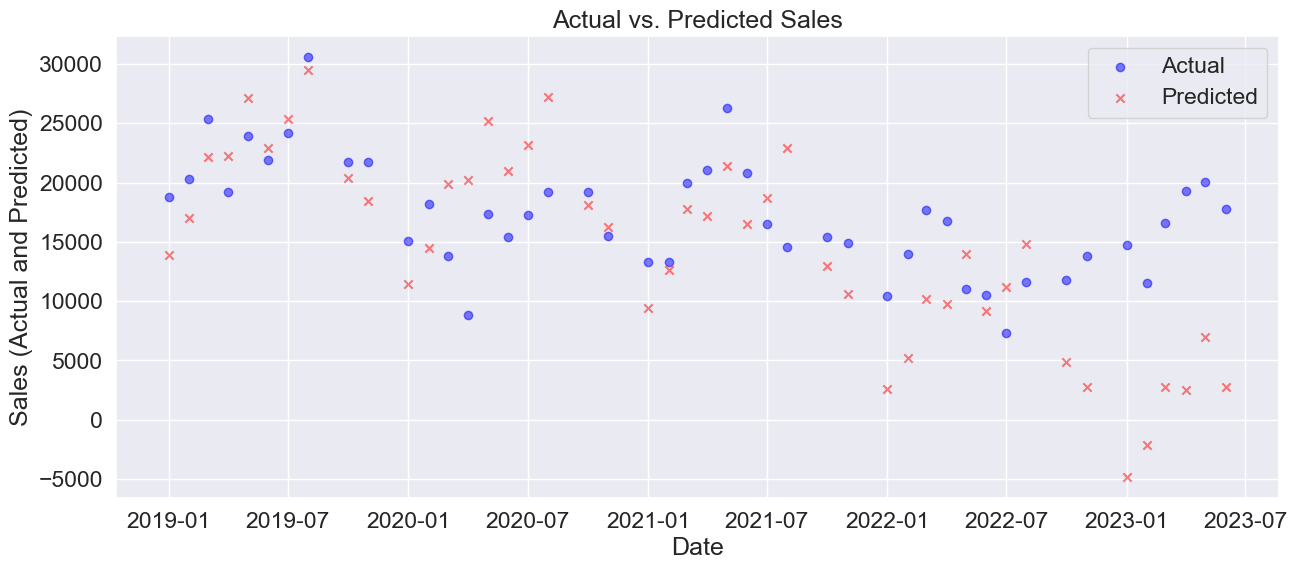

{'model_all - mae': 5521.189681524186, 'model_all - R2': -1.3644790554142725}


In [12]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Define the regression formula with all the variables as independent variables
formula = 'AccordSales ~ CPIAll  + CPIEnergy + MonthFactor '

ols_model3 = smf.ols(formula = formula, data = car_train)

# Fit the model
model3 = ols_model3.fit()
print(model3.summary())

metrics_dict_2 = {}

# Assuming you have a DataFrame 'car_test' with the same columns as 'car_train'
actual_sales = car_test['AccordSales']
predicted_sales = model3.predict(car_test)

metrics_dict_2["model_all - mae"] = mean_absolute_error(actual_sales, predicted_sales)
metrics_dict_2["model_all - R2"] = r2_score(actual_sales, predicted_sales)

# Create a scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(car_test["Date"], actual_sales, label='Actual', color='blue', marker='o', alpha=0.5)
plt.scatter(car_test["Date"], predicted_sales, label='Predicted', color='red', marker='x', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Sales (Actual and Predicted)')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()
print(metrics_dict_2)

In [13]:
new_car_train = combined_df[combined_df["Year"] <= 2018]
new_car_test = combined_df[combined_df["Year"] > 2018]
sales_train_ =  new_car_train["AccordSales"]
sales_test_  =  new_car_test["AccordSales"]
predicted_sales_train = model3.predict(new_car_train)
predicted_sales_test = model3.predict(new_car_test)
print("This is train set OSR",r2_score(sales_train_, predicted_sales_train)) ##  predicting on the things we already know, the train set.
print("This is test set OSR",r2_score(sales_test_ ,predicted_sales_test)) ## This is us predicting on things we don't know, the test set

This is train set OSR 0.7438843032883199
This is test set OSR -1.3644790554142725


## **Explanation of the new model, and the OSR scores**

For this part I approached it simply by dropping the variables, and seeing if they improved the test OSR, and increasing the f-statistic and adjusted and r_squared. So first I had  train set OSR 0.7481122562684126 and  test set OSR -4.34196971635519, which tells me that its really bad the fact its negative when it comes to predicting the test values. By removing MilesTraveled, the value of Test set OSR decrease to -2.1 and increases the f-statistic a little bit, and improves the adjusted square a bit. Up next I removed Unemployment, and it decreases the Test OSR to -1.8 which is better and increase the f-statistic, lowers the normal r_squared but increases the adjust_r_squared which is what we want. Then I removed AccordQuries, and it lowered the test OSR to -1.3 which is still and improvement and increased the f-statistic a litte bit as well. The r_squared decreased but the adjust r squared increased once again, which is what we want. By removing CPIALL both train OSR decrease from 0.74 to 0.54 which indicates we need it, and also it takes the test OSR to -8.0 which is really bad compared to the old one, so we should keep CPIALL. Same thing happens to both CPIEnergy and Month Factor, so we should keep them but somethign weird happens when you remove MonthFactor, you see the test set OSR go all the way down to -0.69 which is the lowest it went, which tells us that months aren't predicting correctly but the training set OSR goes from 0.74 all the way down to 0.13, so you have to keep the MonthFactor and also the r and adjusted r square drop tremendously low.


Based on that long explanation I would only keep CPIALL, CPIEnergy, and MonthFactor. The reason for the big difference between the Train and Test OSR has to be coming from the fact some unknown variable has impacted our test set which we aren't accounting for. I think the unaccounted variable can be covid, the recession, the slow down of car manufactures, and less need to travel since work is online and the Russia and Ukrain conflict, it can be a lot of things. But if you were to do the test OSR from the year 2019 to 2020 Junuary you would see a high Test OSR, which tells us something happened in 2020 start which is causing our OSR to be negative or simply low compared to our train OSR.

## **Final Model with outside DataSet to improve the model**

Let us now consider adding an additional feature/variable to your final model
from part (c). Based on your knowledge and intuition, think of a monthly variable that you
hypothesize might be related to Honda sales. Provide a one or two-sentence explanation for
your choice. Search online for a data source for your chosen variable (if you are not able to
find data, then you need to pick a different variable), and append your collected data as a
new column in the original data file. (It is OK to use variables similar to what we used above,
i.e., a different economic indicator or Google trends data for a different search term, but feel
free to get as creative as you like.)
Now, build a new regression model with your additional chosen feature in addition to the
features that you selected in part (c). Does the new feature add any predictive value? Justify
your answer based on the results of your analysis.

In [14]:
new_car_train.columns

Index(['MonthNumeric', 'MonthFactor', 'Year', 'AccordSales', 'Unemployment',
       'AccordQueries', 'CPIAll', 'CPIEnergy', 'MilesTraveled', 'Date', 'DATE',
       'TOTALSA'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:            AccordSales   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     8.493
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.08e-08
Time:                        12:29:16   Log-Likelihood:                -561.64
No. Observations:                  60   AIC:                             1157.
Df Residuals:                      43   BIC:                             1193.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

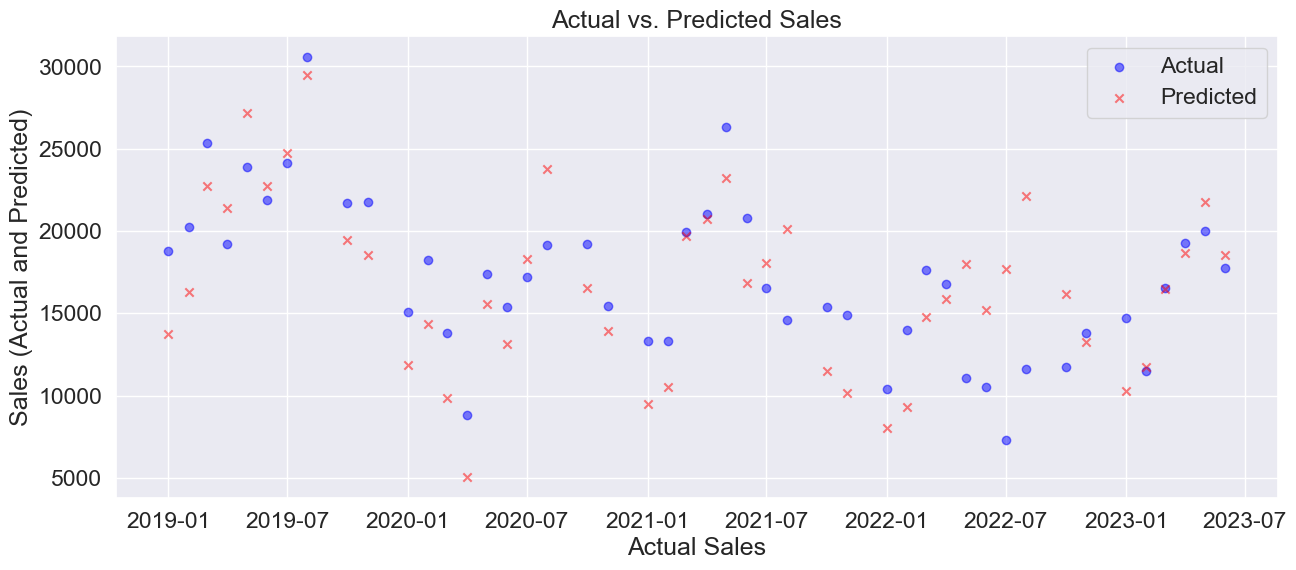

{'model_all - mae': 2916.9233909727213, 'model_all - R2': 0.3681224974362661}


In [15]:
metrics_dict = {}

ols_d = smf.ols(formula ='AccordSales ~  CPIAll  + CPIEnergy + MonthFactor + Year + AccordQueries + TOTALSA  ',
                 data = new_car_train)

modelD = ols_d.fit()
print(modelD.summary())

# Assuming you have a DataFrame 'car_test' with the same columns as 'car_train'
actual_sales_2 = new_car_test['AccordSales']
predicted_sales_2 = modelD.predict(new_car_test)

metrics_dict["model_all - mae"] = mean_absolute_error(actual_sales_2, predicted_sales_2)
metrics_dict["model_all - R2"] = r2_score(actual_sales_2, predicted_sales_2)

# Create a scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(car_test["Date"], actual_sales_2, label='Actual', color='blue', marker='o', alpha=0.5)
plt.scatter(car_test["Date"], predicted_sales_2, label='Predicted', color='red', marker='x', alpha=0.5)

plt.xlabel('Actual Sales')
plt.ylabel('Sales (Actual and Predicted)')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()
print(metrics_dict)

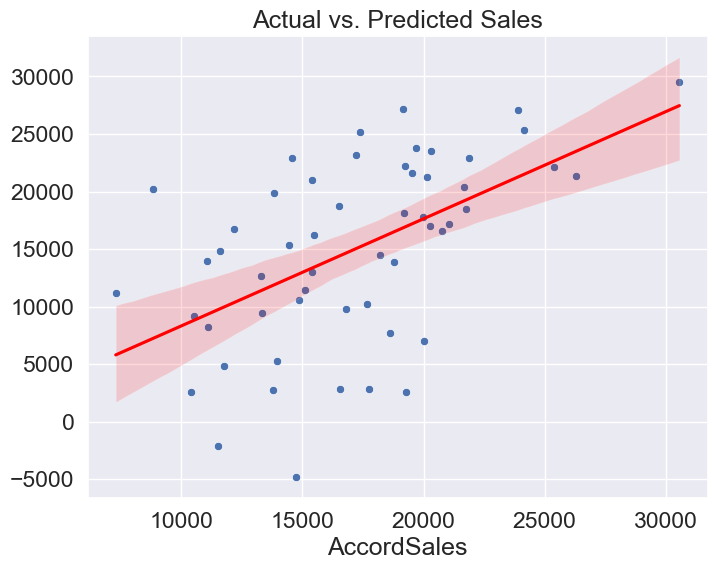

In [187]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x= actual_sales, y= predicted_sales)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales'
          )
# Add a regression line
sns.regplot(x = actual_sales, y = predicted_sales, 
            scatter=False, color='red')
plt.show()

Let us now consider adding an additional feature/variable to your final model
from part (c). Based on your knowledge and intuition, think of a monthly variable that you
hypothesize might be related to Honda sales. Provide a one or two-sentence explanation for
your choice. Search online for a data source for your chosen variable (if you are not able to
find data, then you need to pick a different variable), and append your collected data as a
new column in the original data file. (It is OK to use variables similar to what we used above,
i.e., a different economic indicator or Google trends data for a different search term, but feel
free to get as creative as you like.)
Now, build a new regression model with your additional chosen feature in addition to the
features that you selected in part (c). Does the new feature add any predictive value? Justify
your answer based on the results of your analysis.

In [188]:
new_car_train = combined_df[combined_df["Year"] <= 2018]
new_car_test = combined_df[combined_df["Year"] > 2018]
sales_train_ =  new_car_train["AccordSales"]
sales_test_  =  new_car_test["AccordSales"]
predicted_sales_train = modelD.predict(new_car_train)
predicted_sales_test = modelD.predict(new_car_test)
print("This is train set OSR",r2_score(sales_train_, predicted_sales_train)) ##  predicting on the things we already know, the train set.
print("This is test set OSR",r2_score(sales_test_ ,predicted_sales_test))

This is train set OSR 0.7596232503562382
This is test set OSR 0.3681224974362661


## **Conclusion**

So from previous model I decided to keep CPIALL, CPIEnergy and MonthFactor but also added in AccordQurries because it asks if variable that we hypothize might be related to Honda Sales, and it has to be AccordQuerries, where people search for Honda cars on Google because they are looking to buy the car, but its very small, even adding it or removing doesn't change the MAE or even the r-score here.

However, if this question is asking about us searching online for data I decided to search total sales for Honda, which I found on Fred which had records from all the way in 1979 but only used from 2014 to 2023, it greatly impacted the the test OSR from taking form test OSR -1.3 which I was stuck at all the way to test OSR of 0.36. I believe my new variable added signficant improvement when predicting. The case might because we are looking for total sale for the month only compared to Accord Sales in Honda, which tell us that if people are even buying cars, especially Honda Cars, so this definetly adds a proistive correlation on the model. The r-square is at 0.760 and the adjusted r-squared is at 0.670 which is may not seem better than our model but our test OSR says otherwise, so we should look at different variables when determing which features are good for our model

